In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import sys
sys.path.insert(0, '/data/programs/probe_position_correction_w_ptychonn/pppc')
sys.path.insert(0, '/data/programs/probe_position_correction_w_ptychonn')
import numpy as np
import torch
import matplotlib.pyplot as plt

import pppc
from pppc.configs import PtychoNNTrainingConfigDict
from pppc.ptychonn.trainer import PtychoNNTrainer
from pppc.ptychonn.dataset_handle import HDF5Dataset
from pppc.ptychonn.model import PtychoNNModel

In [9]:
config_dict = PtychoNNTrainingConfigDict()
config_dict['batch_size_per_process'] = 64
config_dict['num_epochs'] = 60
config_dict['learning_rate_per_process'] = 1e-3
config_dict['optimizer'] = 'adam'
config_dict['model_save_dir'] = '../../trained_models/model_36SpiralDatasets'
config_dict['validation_ratio'] = 0.01
dataset = HDF5Dataset('data/data_train.h5', verbose=False)
config_dict['dataset'] = dataset
config_dict['model'] = PtychoNNModel(n_levels=3)
config_dict['debug'] = False

Check some data distributions. 

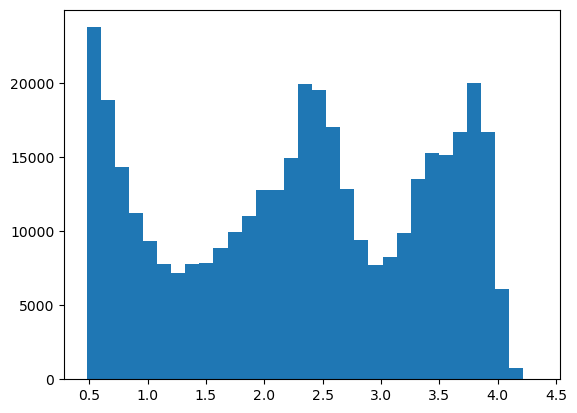

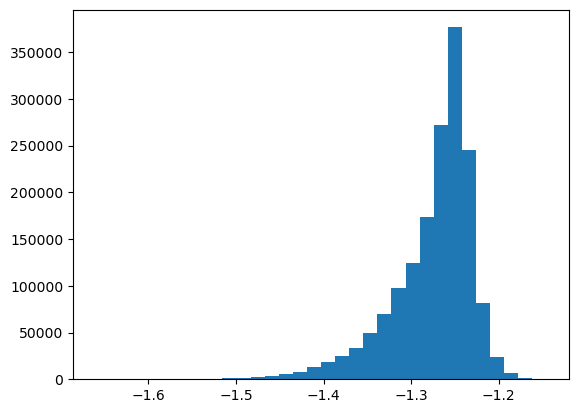

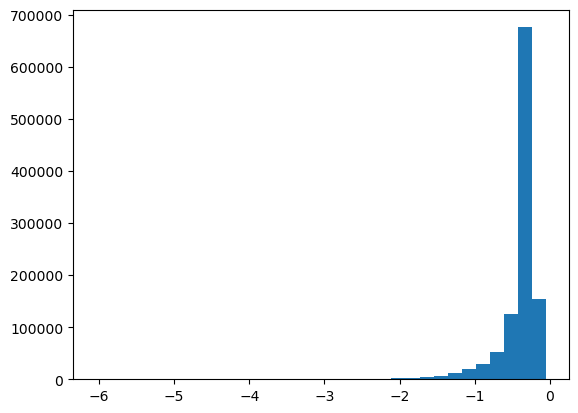

In [10]:
def plot_distribution(x):
    x = x.reshape(-1)
    x = x[x > 0]
    plt.hist(np.log10(x), bins=32)
    plt.show()

x, y_mag, y_ph = dataset.__getitems__(list(range(100)))
plot_distribution(x.numpy())
plot_distribution(y_mag.numpy())
plot_distribution(y_ph.numpy())

In [11]:
trainer = PtychoNNTrainer(config_dict)
trainer.build()

[2023-11-22 11:13:21,627] Using DataParallel with 2 devices.


In [12]:
#print(trainer.model)
from torchsummary import summary
summary(trainer.model, (1, 256, 256), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 256, 256]             320
            Conv2d-2         [-1, 32, 256, 256]             320
              ReLU-3         [-1, 32, 256, 256]               0
              ReLU-4         [-1, 32, 256, 256]               0
            Conv2d-5         [-1, 32, 256, 256]           9,248
              ReLU-6         [-1, 32, 256, 256]               0
         MaxPool2d-7         [-1, 32, 128, 128]               0
            Conv2d-8         [-1, 32, 256, 256]           9,248
              ReLU-9         [-1, 32, 256, 256]               0
        MaxPool2d-10         [-1, 32, 128, 128]               0
           Conv2d-11         [-1, 64, 128, 128]          18,496
             ReLU-12         [-1, 64, 128, 128]               0
           Conv2d-13         [-1, 64, 128, 128]          18,496
             ReLU-14         [-1, 64, 1

In [ ]:
trainer.run_training()

In [ ]:
trainer.plot_training_history()

In [ ]:
trainer.run_testing((0, 1000, 2000, 3000, 4000), dataset='train')